#### Predict house price based on different algorithms

         - Linear Regression
         - KNN-Regressor-  Un normalized data/ Normalized data sets
         - Random forest Regressor - with differet number of estimator
         - Decision Tree Regressor
         - XGB Boost

In [2]:
#import all important libraries
import pandas as pd
import numpy as np

In [3]:
#load dataset
dataset_train=pd.read_csv('csv\\process_final_modified.csv')

## get number of rows and columns in train.csv
print(dataset_train.shape)

dataset_train.head()

(2915, 272)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [4]:
df_Train=dataset_train.iloc[:1456:]
df_Test=dataset_train.iloc[1456:,:]

In [5]:
print(df_Train.shape)
print(df_Test.shape)

(1456, 272)
(1459, 272)


In [6]:
test_cols=list(df_Test.columns)
test_cols.remove('SalePrice')
df_Test=df_Test[test_cols]
#df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [7]:
cols = list(df_Train.columns)
cols.remove('SalePrice')

In [8]:
# Creating the Feature Matrix:

X = df_Train[cols]

# check the size:
print(X.shape)

# show the first 5 rows
X.head()

(1456, 271)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
y = df_Train['SalePrice']

In [10]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1019, 271)
(1019,)
(437, 271)
(437,)


##### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

my_linreg = LinearRegression()

my_linreg.fit(X_train, y_train)

LinearRegression()

In [12]:
# printing Theta0 using attribute "intercept_":
#print(my_linreg.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
#print(my_linreg.coef_)

In [13]:
# make predictions on the testing set
y_prediction = my_linreg.predict(X_test)

#print(y_prediction)

In [14]:
from sklearn import metrics
import numpy as np

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse_linear = np.sqrt(mse)

print(rmse_linear)

26601.470750772518


Text(0, 0.5, 'prediction value')

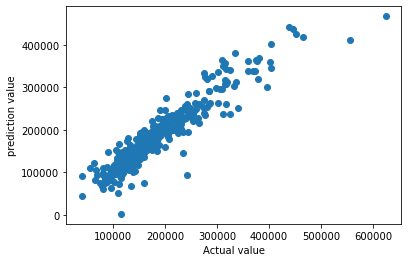

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_prediction)
plt.xlabel('Actual value')
plt.ylabel('prediction value')

In [16]:
y_prediction_test= my_linreg.predict(df_Test)
print(y_prediction_test)

[121058.43745364 192761.73115058 187216.73770758 ... 174883.62378798
 116846.35667519 222736.42027508]


In [17]:
submission = pd.DataFrame()
submission['Id'] = df_Test.Id
submission['SalePrice'] = y_prediction_test
submission.head()

,Id,SalePrice
1456,1461,121058.437454
1457,1462,192761.731151
1458,1463,187216.737708
1459,1464,198778.591753
1460,1465,202563.048455


In [18]:
submission.shape

(1459, 2)

In [19]:
submission.to_csv('csv\\submission.csv', index=False)

#####  KNN-Regressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

In [21]:
knn=KNeighborsRegressor(n_neighbors=10)

In [22]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [23]:
y_predict_knn = knn.predict(X_test)
#y_predict_knn

In [24]:
from sklearn import metrics

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_predict_knn)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse_knn = np.sqrt(mse)

print(rmse_knn)

47839.48483642852


Text(0, 0.5, 'prediction value')

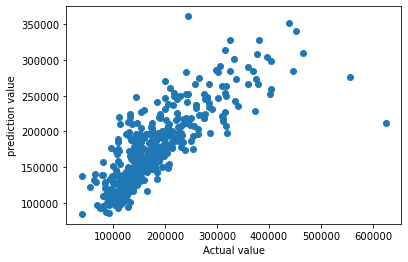

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_predict_knn)
plt.xlabel('Actual value')
plt.ylabel('prediction value')

            Predict values for testing data set and import in to Kaggle and check the rank 

In [26]:
y_prediction_test=knn.predict(df_Test)

In [27]:
submission_knn = pd.DataFrame()
submission_knn['Id'] = df_Test.Id

In [28]:
submission_knn['SalePrice'] = y_prediction_test

In [29]:
submission_knn.head()

,Id,SalePrice
1456,1461,148730.0
1457,1462,191180.0
1458,1463,195950.0
1459,1464,197610.0
1460,1465,171800.0


In [30]:
submission_knn.shape

(1459, 2)

In [31]:
submission_knn.to_csv('csv\\submission_knn.csv', index=False)

        Normalize data

In [32]:
from sklearn import preprocessing

normalized_X = preprocessing.scale(X)
normalized_test = preprocessing.scale(df_Test)

In [33]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(normalized_X, y, test_size=0.3, random_state=42)

knn_normalized=KNeighborsRegressor(n_neighbors=10)
knn_normalized.fit(X_train_n, y_train_n)
y_predict_knn_normalized = knn_normalized.predict(X_test_n)

In [34]:
mse = metrics.mean_squared_error(y_test_n, y_predict_knn_normalized)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse_knn_normalized = np.sqrt(mse)

print(rmse_knn_normalized)

36871.78614379872


        After normalized, got low RMSE value

Text(0, 0.5, 'prediction value')

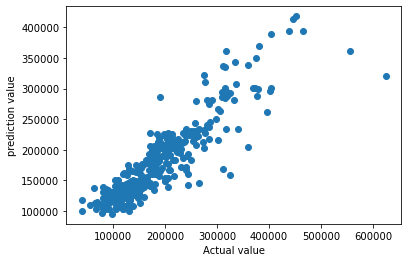

In [35]:
plt.scatter(y_test_n,y_predict_knn_normalized)
plt.xlabel('Actual value')
plt.ylabel('prediction value')

In [36]:
y_prediction_test_N=knn_normalized.predict(normalized_test)
submission_knn = pd.DataFrame()
submission_knn['Id'] =  df_Test.Id
submission_knn['SalePrice'] = y_prediction_test_N
submission_knn.head()

,Id,SalePrice
1456,1461,136535.0
1457,1462,143155.0
1458,1463,189990.0
1459,1464,206650.0
1460,1465,248992.6


In [37]:
submission_knn.to_csv('csv\\submission_knn_normalized.csv', index=False)

##### RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(n_estimators = 20, random_state=0)
randomforest.fit(X_train_n, y_train_n)
y_predict_randomforest = randomforest.predict(X_test_n)

In [39]:
mse = metrics.mean_squared_error(y_test_n, y_predict_randomforest)
rmse_randomforest = np.sqrt(mse)
print(rmse_randomforest)

26398.688615276573


Text(0, 0.5, 'prediction value')

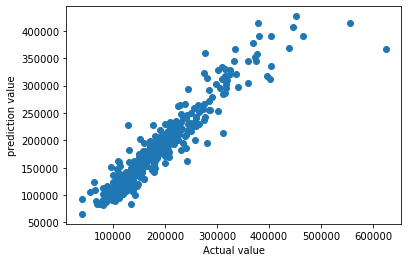

In [40]:
plt.scatter(y_test_n,y_predict_randomforest)
plt.xlabel('Actual value')
plt.ylabel('prediction value')

      check how RMSE change with number of estimator

In [41]:
n_estimators_list=[20,100,200,250,500]
rmse_list=[];
for k in n_estimators_list:
    randomforest = RandomForestRegressor(n_estimators = k, random_state=42)
    randomforest.fit(X_train_n, y_train_n)
    y_predict_randomforest = randomforest.predict(X_test_n)
    mse = metrics.mean_squared_error(y_test_n, y_predict_randomforest)
    rmse = np.sqrt(mse)
    
    rmse_list.append(rmse)
print(rmse_list)

[27782.597705540535, 25823.096603467173, 26316.402998016085, 26383.42863037055, 26135.833108154002]


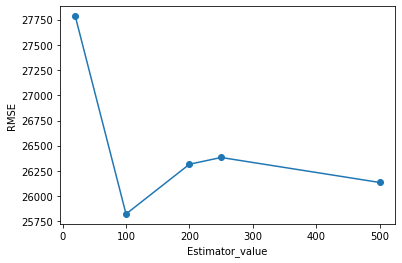

In [42]:
plt.scatter(n_estimators_list,rmse_list)
plt.plot(n_estimators_list,rmse_list)
plt.xlabel('Estimator_value')
plt.ylabel('RMSE')
plt.show()

         estimator value 100 gives low RMSE

In [43]:
randomforest_100 = RandomForestRegressor(n_estimators = 100, random_state=0)
randomforest_100.fit(X_train_n, y_train_n)
y_prediction_test_N=randomforest_100.predict(normalized_test)
submission_randomforest = pd.DataFrame()
submission_randomforest['Id'] =  df_Test.Id
submission_randomforest['SalePrice'] = y_prediction_test_N
submission_randomforest.head()

,Id,SalePrice
1456,1461,126720.00
1457,1462,158268.30
1458,1463,184351.90
1459,1464,183617.34
1460,1465,198405.27


In [44]:
submission_randomforest.to_csv('csv\\submission_randomForest.csv', index=False)

##### DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

my_decisionTree = DecisionTreeRegressor()
my_decisionTree.fit(X_train_n, y_train_n)
my_decisionTree_predict = my_decisionTree.predict(X_test_n)
mse = metrics.mean_squared_error(y_test_n, my_decisionTree_predict)
rmse_decisionTree = np.sqrt(mse)
print(rmse_decisionTree)

43390.0904112039


##### XGB Boost

In [62]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 1000)

xg_reg.fit(X_train_n, y_train_n)

y_pred = xg_reg.predict(X_test_n)
mse = metrics.mean_squared_error(y_test_n, y_pred)
rmse_xgboost = np.sqrt(mse)
print(rmse_xgboost)


y_prediction_test_N=xg_reg.predict(normalized_test)
submission_XGt = pd.DataFrame()
submission_XGt['Id'] =  df_Test.Id
submission_XGt['SalePrice'] = y_prediction_test_N
submission_XGt.head()

[19:23:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
23390.007447853728


,Id,SalePrice
1456,1461,132403.781250
1457,1462,156898.281250
1458,1463,188056.406250
1459,1464,195916.953125
1460,1465,186273.187500


In [47]:
submission_XGt.to_csv('csv\\submission_XG.csv', index=False)

### Summary

In [56]:
print("********Linear Regresson*********")
print("RMSE for Linear Regression                               -",rmse_linear)
print("")
print("*********KNN-Regressor-Scikit learn*********")
print("RMSE for KNN-Regression(before normalized data-set)      -",rmse_knn)
print("RMSE for KNN-Regression(after normalized data-set)       -",rmse_knn_normalized)
print("")
print("*********Random forest Regressor*********")
print("RMSE for Random forest Regressor(normalized data)        -",rmse_list[1])
print("")
print("*********DecisionTreeRegressor*********")
print("RMSE for DecisionTreeRegressor                           -",rmse_decisionTree)
print("")
print("*********XGB Boost*********")
print("RMSE for XGB Boost                                       -",rmse_xgboost)

********Linear Regresson*********
RMSE for Linear Regression                               - 26601.470750772518

*********KNN-Regressor-Scikit learn*********
RMSE for KNN-Regression(before normalized data-set)      - 47839.48483642852
RMSE for KNN-Regression(after normalized data-set)       - 36871.78614379872

*********Random forest Regressor*********
RMSE for Random forest Regressor(normalized data)        - 25823.096603467173

*********DecisionTreeRegressor*********
RMSE for DecisionTreeRegressor                           - 43390.0904112039

*********XGB Boost*********
RMSE for XGB Boost                                       - 23390.007447853728
